### Simple example

In [1]:
import naminggamesal as ngal #importing the library

In [2]:
N = 20 #population size
M = 20 #number of meanings/objects
W = 20 #number of words


#configuration for a first experiment. Random Topic Choice
xp_cfg = {
            "step": "log_improved",
            "pop_cfg": {
            "voc_cfg": {
                "voc_type": "matrix_new"
            },
            "strat_cfg": {
                "vu_cfg": {          
                "vu_type": "minimal",
                },
                "success_cfg": {
                "success_type": "global_norandom"
                },
                "strat_type": "naive"  #here is the part that we are studying
            },
            "nbagent": N,
            "env_cfg": {
                "env_type": "simple_realwords",
                "M": M,
                "W": W
            },
            "interact_cfg": {
                "interact_type": "speakerschoice",
                }
                }
                }

#configuration for a 2nd experiment, will be compared to the first one. Active Topic Choice
xp_cfg_2 = {
            "step": "log_improved",
            "pop_cfg": {
            "voc_cfg": {
                "voc_type": "matrix_new"
            },
            "strat_cfg": {
                "vu_cfg": {
                "vu_type": "minimal"
                },
                "success_cfg": {
                "success_type": "global_norandom"
                },
                "strat_type": 'lapsmax_mab_explothreshold'  #here is the part that we are studying
            },
            "nbagent": N,
            "env_cfg": {
                "env_type": "simple_realwords",
                "M": M,
                "W": W
            },
            "interact_cfg": {
                "interact_type": "speakerschoice"
                }
                }
                }



In [3]:
db = ngal.ngdb.NamingGamesDB() #setting up the database

In [4]:
#xp = db.get_experiment(force_new=True,**xp_cfg)
xp = db.get_experiment(**xp_cfg)
xp2 = db.get_experiment(**xp_cfg_2)

In [5]:
Tmax = 10000 #number of interactions for the simulations
xp.continue_exp_until(Tmax)
xp2.continue_exp_until(Tmax)

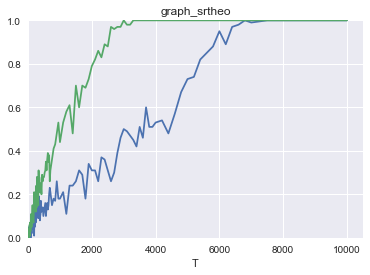

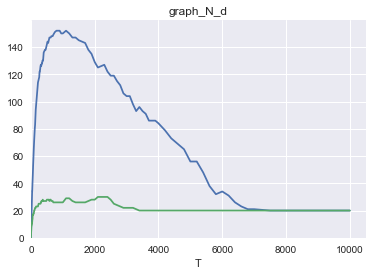

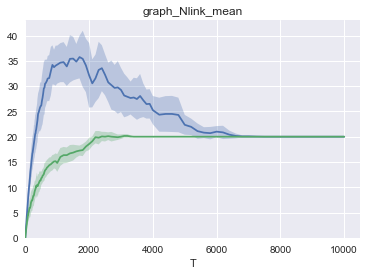

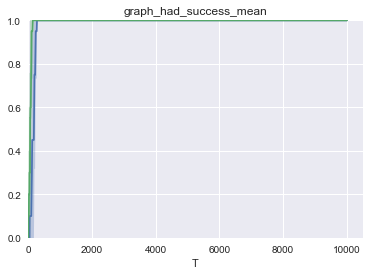

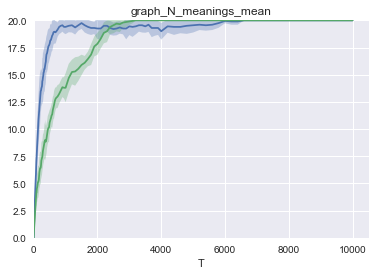

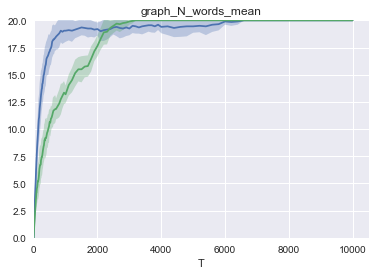

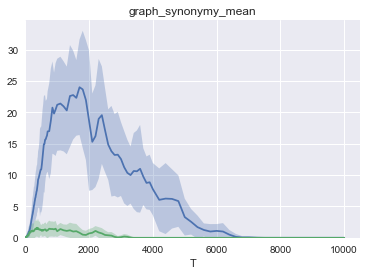

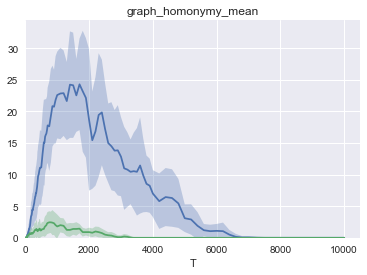

In [6]:
measures = ['srtheo','N_d','Nlink','had_success','N_meanings','N_words','synonymy','homonymy']
for f in measures:
    gr = xp.graph(f)
    gr.add_graph(xp2.graph(f))
    #gr.xmax=Tmax
    gr.xmin=0
    gr.show()
    
#showing measures: 

#srtheo: probability of success (1. -> all share the same voc),
#N_d: global complexity (number of distinct associations used over the whole population),
#N_link: average size of voc per agent, = local complexity
#had_success: percentage of agents having had a successful interaction
#N_meanings: average number of meanings in agents' vocs
#N_words: average number of words in agents' vocs
#synonymy and homonymy: averaged over agents, number of conflictual associations
